In [2]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

%matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


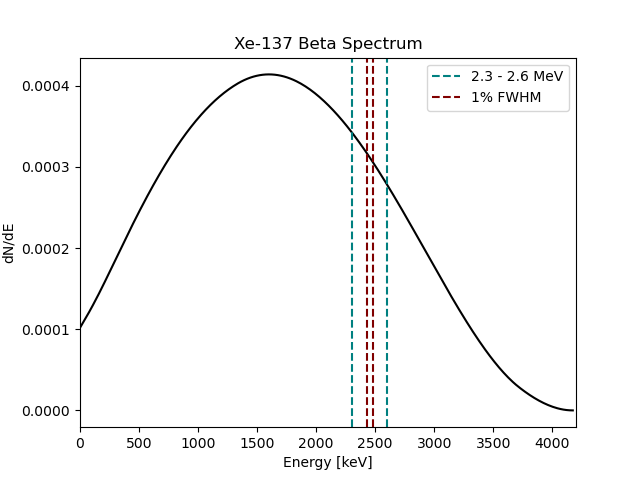

In [3]:
spectrum = pd.read_csv("../data/Xe137Spectrum.txt", delimiter="\t")
plt.figure()
plt.plot(spectrum["Energy [keV]"], spectrum["dN/dE"], c="k")
plt.xlim(0,4200)
plt.xlabel("Energy [keV]")
plt.ylabel("dN/dE")

plt.axvline(x = 2300, color = 'Teal', linestyle="--", label = "2.3 - 2.6 MeV")
plt.axvline(x = 2600, color = 'Teal', linestyle="--")

plt.axvline(x = 2433.3804, color = 'Maroon', linestyle="--", label = "1% FWHM")
plt.axvline(x = 2482.5396, color = 'Maroon', linestyle="--")
plt.legend()
plt.title("Xe-137 Beta Spectrum")

plt.savefig(f"plots/Technote/Xe-137.pdf")

In [4]:
# Compute total area
total_area = np.trapz(spectrum["dN/dE"], spectrum["Energy [keV]"])

# Select energy range 2300–2600
mask = (spectrum["Energy [keV]"] >= 2300) & (spectrum["Energy [keV]"] <= 2600)
selected_area = np.trapz(spectrum["dN/dE"][mask], spectrum["Energy [keV]"][mask])

# Compute fraction
fraction = selected_area / total_area

print(f"Total area: {total_area:.3f}")
print(f"Area between 2300-2600 keV: {selected_area:.3f}")
print(f"Fraction in range: {fraction:.3%}")

Total area: 1.006
Area between 2300-2600 keV: 0.093
Fraction in range: 9.268%
